In [1038]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
from scipy.ndimage import uniform_filter1d
import IPython.display as ipd

# Import samples
kick_samples = [lr.load(p)[0] for p in Path().glob('../data/Kicks/*.wav')]
sr = [lr.load(p)[1] for p in Path().glob('../data/Kicks/*.wav')]

def extract_features(signal,sr):
    return [
        # np.mean(lr.feature.zero_crossing_rate(signal)[0]),
        lr.feature.spectral_centroid(y=signal)[0,0],
        # lr.feature.spectral_bandwidth(y=signal)[0,0]
        # lr.feature.spectral_contrast(y=signal)[0,0],
        # lr.feature.spectral_flatness(y=signal)[0,0]
        # attack_time(signal),
        decay_time(signal)
    ]

def attack_time(signal):
    rms = lr.feature.rms(y=signal, frame_length=856, hop_length=40)
    times = lr.frames_to_time(np.arange(len(rms[0])), hop_length=40)
    rms = uniform_filter1d(rms, size=5)
    peak_index = np.argmax(rms[0][:1000])
    return times[peak_index]
    

def decay_time(signal):
    rms = lr.feature.rms(y=signal, frame_length=856, hop_length=40)
    times = lr.frames_to_time(np.arange(len(rms[0])), hop_length=40)
    rms = uniform_filter1d(rms, size=5)
    peak_index = np.argmax(rms)
    decay_threshold = rms[0][peak_index] * 0.1
    decay_index = peak_index + np.argmax(rms[0][peak_index:] < decay_threshold) # Get index at which amplitude has fallen to 30% of peak
    decay_time = times[decay_index] - times[peak_index]
    return decay_time

plt.figure(figsize=(5,14))

kick_features = np.array([extract_features(x,sr) for x in kick_samples])

scaler = MinMaxScaler((0,1))
scaled_features = scaler.fit_transform(kick_features[:,:])

weights = np.array([1,0.2,0.8])
weighted_features = scaled_features * weights

ValueError: operands could not be broadcast together with shapes (122,2) (3,) 

<Figure size 500x1400 with 0 Axes>

In [1032]:
from sklearn.cluster import KMeans
import seaborn as sns

# Apply K-means clustering
n_clusters = 2  # You can change this based on how many different types of kicks you expect
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(scaled_features)

# Visualize the clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=labels, palette='viridis', s=100)
# plt.xlabel('Feature 1 (e.g., Zero Crossing Rate)')
# plt.ylabel('Feature 2 (e.g., Spectral Centroid)')
# plt.title('K-means Clustering of Kick Samples')
# plt.show()

In [1039]:
import numpy as np
from sklearn.metrics import pairwise_distances

selected_sample_index = 1

# Calculate similarity within the cluster
similarity_scores = pairwise_distances(weighted_features)
sorted_indices = np.argsort(similarity_scores[selected_sample_index])  # Sort by highest similarity

sample_choices = [23,24,42,29,35]
# sample_choices[0]
sorted_indices

array([  1, 104,  17, 106,  60,  12,  18,  52,   8,  99,  36,  44,   7,
       102, 103,   3, 110,  57,  20,  89,   0,  66, 120, 116,  22,  75,
       115,  96,  65,   6,  68,   5,   4,  87, 111, 112,  25, 121,  32,
        28,  19, 105,  47,  67,  11,  93,  83,  56, 114, 117, 113, 118,
       107, 108,   2,  27, 101,  45, 109,  31,   9,  97,  10,  24,  23,
        81, 119,  82,  14,  85,  34,  58,  49,  62,  15,  55,  51,  63,
        71,  21,  26,  98,  30,  16,  54,  40,  33,  39,  77,  94,  64,
        72,  90,  86,  69,  78,  37,  91,  13,  76,  50,  84,  41,  53,
        92,  73,  79,  74,  48,  38,  70,  61,  29, 100,  59,  46,  95,
        80,  35,  43,  42,  88])

In [1037]:
sample = kick_samples[42]
ipd.Audio(sample,rate=sr[0])

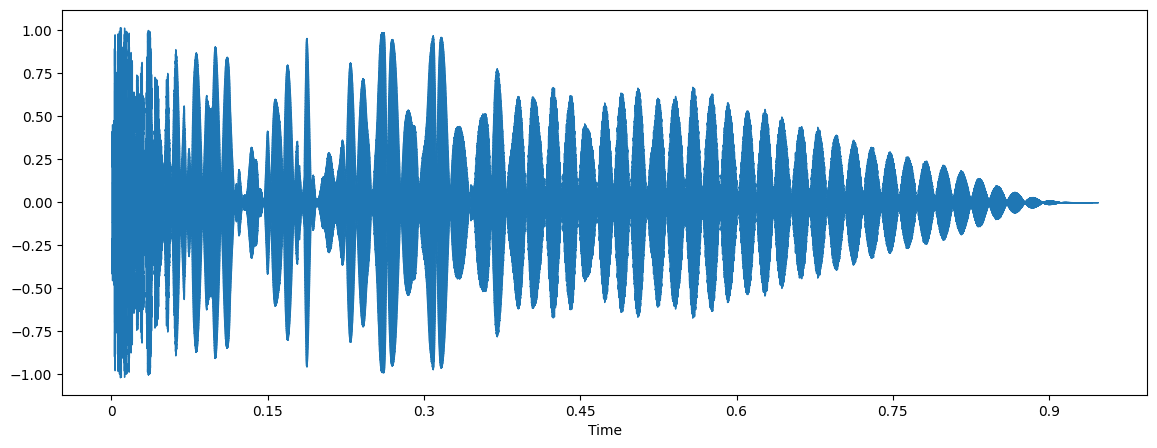

In [961]:
plt.figure(figsize=(14,5))
lr.display.waveshow(sample,sr=sr[0])

/var/folders/sb/r5rwz48d2jx0pdj_t3m2642w0000gn/T/ipykernel_38386/980224814.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


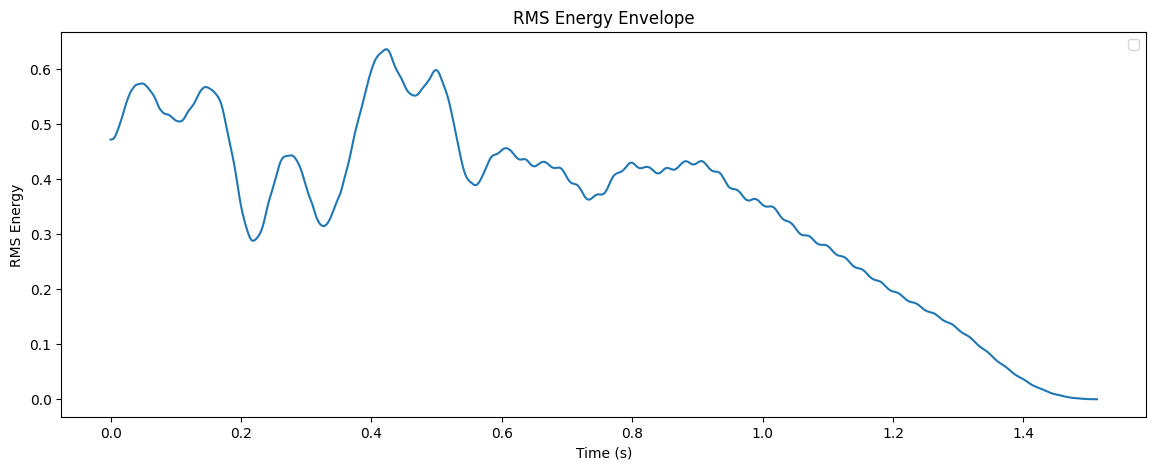

In [962]:
plt.figure(figsize=(14,5))
rms = lr.feature.rms(y=sample, frame_length=856, hop_length=30)
rms = uniform_filter1d(rms, size=20)
times = lr.frames_to_time(np.arange(len(rms[0])),sr=sr[0],hop_length=48)
plt.plot(times,rms[0])
plt.xlabel('Time (s)')
plt.ylabel('RMS Energy')
plt.title('RMS Energy Envelope')
plt.legend()
plt.show()
